Project by :- Ajit waghmode 

solution for oasis task1

Iris flowers Classification ML project
Problem statement:-Iris flower has three
    species; setosa, versicolor, and virginica,
    which differs according to their measurements. 
    Now assume that you have the measurements of the 
    iris flowers according to their species, and here 
    your task is to train a machine learning model that
    can learn from the measurements of the iris species
    and classify them.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("IRIS.csv")

In [23]:
iris = pd.read_csv("iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [24]:
print(iris.shape)

(150, 6)


In [25]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [26]:
# Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [27]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
iris.tail(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
n = len(iris[iris['Species']=='versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 0


In [32]:
n1 = len(iris[iris['Species']=='virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 0


In [33]:
n2 = len(iris[iris['Species']=='setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 0


# Preprocessing the dataset

In [34]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratorary Data Analysis

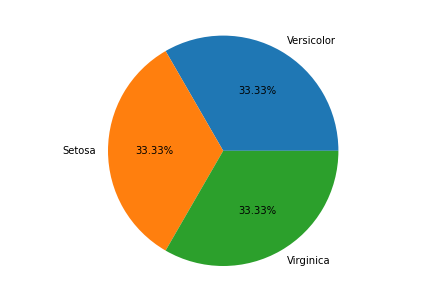

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor','Setosa','Virginica']
s = [50,50,50]
ax.pie(s,labels = l,autopct = '%1.2f%%')
plt.show()

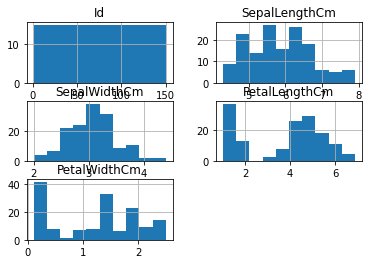

In [36]:
iris.hist()
plt.show()

In [40]:
#scatterplot
color = ['red','Orange','Blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

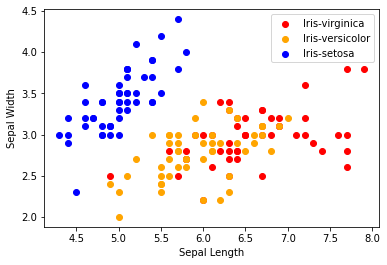

In [39]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

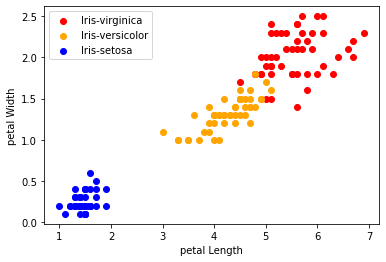

In [41]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

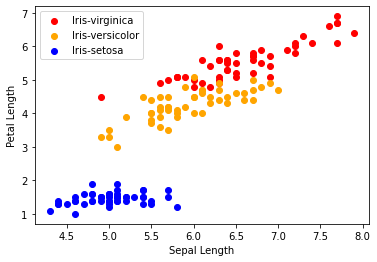

In [42]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

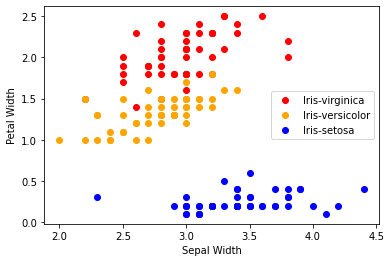

In [44]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [51]:
 iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
corr = iris.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)

# Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Model Training

In [53]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns = ["Species"])
Y = iris['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.30)

In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
model.fit(x_train, y_train)

C:\Users\Ajit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [60]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [61]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [62]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [63]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [64]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


# Received the accuracy of 100.0 in the test dataset in model.